In [1]:
import importlib
from utils import aspect_extraction, sentiment_extraction, general, embeddings, visualizer
import warnings
import pickle
warnings.filterwarnings("ignore")

2023-05-25 23:43:30.899947: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 23:43:32.413688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-25 23:43:34.800539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-25 23:43:34.868796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [2]:
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(general)
importlib.reload(visualizer)
importlib.reload(embeddings)

<module 'utils.embeddings' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/embeddings.py'>

In [3]:
aspects_polarity = {}

def save_results(app, aspect, aspects_polarity, pos, neg):
    if app not in aspects_polarity:
        aspects_polarity[app] = {}

    aspects_polarity[app][aspect] = {}
    aspects_polarity[app][aspect]["pos"] = pos
    aspects_polarity[app][aspect]["neg"] = neg
    return aspects_polarity

## __Tinder__

In [4]:
queries = ["casual sex", "relationship couple boyfriend girlfriend", "friendship friends", "curiosity novelty experience",  "self esteem confidence", "women girls", "men boys", "attractiveness beauty", "intelligence"]
annotated_tinder = general.bm25_annotate(queries, app="tinder")

In [5]:
annotated_tinder.groupby("category")["reviewId"].count()

category
attractiveness      51
casual            1082
curiosity         2339
friendship        3062
intelligence        12
men               1117
relationship      2029
self               538
women             3983
Name: reviewId, dtype: int64

__Casual sex__

In [ ]:
casual_sex_polarities = sentiment_extraction.get_reviews_polarities(annotated_tinder[annotated_tinder.category == "casual"])

In [7]:
casual_sex_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
56945,969b3289-b743-4843-8ab5-bbb2bea5367e,Need casual sex option😔,3,2022-04-08 03:09:10,20.337098,casual,0.030786,0.969214
363052,bdaec147-a6b0-4f97-ab8d-f9e86a276f9d,So good for casual gay sex,5,2017-10-27 13:39:50,18.687423,casual,0.999331,0.000669
494717,151351b4-27fd-48ea-bbe2-fa510c9c0a04,I've had so much casual sex thanks to Tinder!,5,2015-09-05 21:11:04,16.660286,casual,0.999021,0.000979
406137,9a68a8ed-c473-42ea-8a1d-57745c7d37bb,This app is for casual sex which is badd,1,2017-02-24 17:37:25,16.660286,casual,0.001389,0.998611
379864,58811c8c-5371-4774-acac-71c3e1cd9ac5,More of a casual sex up though..serious men 2%,4,2017-08-02 04:27:02,16.660286,casual,0.390191,0.609809


In [8]:
pos = len(casual_sex_polarities[casual_sex_polarities.pos >= .70])/len(casual_sex_polarities[(casual_sex_polarities.pos >= .70) | (casual_sex_polarities.neg >= .70)])
neg = len(casual_sex_polarities[casual_sex_polarities.neg >= .70])/len(casual_sex_polarities[(casual_sex_polarities.pos >= .70) | (casual_sex_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity = save_results("tinder", "casual sex", aspects_polarity, pos, neg)

pos: 0.3953488372093023, neg: 0.6046511627906976


In [9]:
casual_sex_polarities[["score", "pos"]].corr()

,score,pos
score,1.000000,0.646071
pos,0.646071,1.000000


__Relationship__

In [ ]:
relationship_polarities = sentiment_extraction.get_reviews_polarities(annotated_tinder[annotated_tinder.category == "relationship"])

In [11]:
relationship_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
210731,b9f09ba3-7f98-481d-a6c2-cc3e825c8f87,Good app and easy to find friends and boyfrien...,5,2019-10-18 22:02:07,16.433566,relationship,0.999789,0.000211
458420,6af7303d-d32c-4b9f-868c-8273fa30a6e5,Great way to either make some friends or to tr...,5,2016-04-09 19:31:10,14.062603,relationship,0.999380,0.000620
101187,f5f30bc2-90c3-4f86-b016-ac113dac72dc,"Bad app no good, no dates, no girlfriend me sp...",1,2021-06-15 15:03:34,13.295326,relationship,0.000372,0.999628
136251,492f8ca2-3360-45da-8993-f087d21904cc,1 star for letting my boyfriend use this throu...,1,2020-11-28 00:13:36,11.831465,relationship,0.005834,0.994166
74399,59d386f6-012e-4b8c-9aec-683301b3e84c,Got girlfriend,5,2021-12-14 12:01:53,11.505533,relationship,0.996761,0.003239


In [12]:
pos = len(relationship_polarities[relationship_polarities.pos >= .70])/len(relationship_polarities[(relationship_polarities.pos >= .70) | (relationship_polarities.neg >= .70)])
neg = len(relationship_polarities[relationship_polarities.neg >= .70])/len(relationship_polarities[(relationship_polarities.pos >= .70) | (relationship_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity = save_results("tinder", "relationship", aspects_polarity, pos, neg)

pos: 0.5146761133603239, neg: 0.4853238866396761


In [13]:
relationship_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.661604
score,0.661604,1.000000


__Friendship__

In [ ]:
friendship_polarities = sentiment_extraction.get_reviews_polarities(annotated_tinder[annotated_tinder.category == "friendship"])

In [15]:
friendship_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
243041,b2a10cd8-c77a-40eb-a99f-2c9c5f5b0e8a,Excellent Chat friendship app.... i got 3 dece...,5,2019-06-03 16:00:58,14.010916,friendship,0.998957,0.001043
19387,10faf559-bdc7-40e4-b47c-8e65b2002dd2,friendship goal,5,2022-12-01 04:45:02,13.120790,friendship,0.999828,0.000172
121127,951f6319-9df5-43a9-802d-88ec389dedc1,Find friendship,5,2021-02-22 18:30:07,13.120790,friendship,0.999794,0.000206
2350,6208b7b7-64a1-4e13-ad7b-fdf2d8fca737,friendship good work,5,2023-02-28 18:26:25,12.514914,friendship,0.999869,0.000131
416751,20f1e402-c688-40e2-a369-5860e23355a8,Application for friendship,5,2016-12-20 03:36:22,12.514914,friendship,0.997227,0.002773


In [16]:
pos = len(friendship_polarities[friendship_polarities.pos >= .70])/len(friendship_polarities[(friendship_polarities.pos >= .70) | (friendship_polarities.neg >= .70)])
neg = len(friendship_polarities[friendship_polarities.neg >= .70])/len(friendship_polarities[(friendship_polarities.pos >= .70) | (friendship_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity = save_results("tinder", "friendship", aspects_polarity, pos, neg)

pos: 0.8420013166556946, neg: 0.15799868334430547


In [17]:
friendship_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.662075
score,0.662075,1.000000


__Curiosity__

In [ ]:
curiosity_polarities = sentiment_extraction.get_reviews_polarities(annotated_tinder[annotated_tinder.category == "curiosity"])

In [19]:
curiosity_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
468392,e427285d-8a28-422b-8482-fd91a2af46b4,Concept is a novelty that wears off however,4,2016-02-13 17:33:50,14.317041,curiosity,0.001714,0.998286
488972,d0cfa4e5-fd92-4926-b760-52b75677021b,My sociopathic curiosity and appetite for cons...,5,2015-10-14 21:33:53,9.744409,curiosity,0.979886,0.020114
226051,5bde8454-8d95-4bec-b289-91a1e8804ad0,"faltuest app, i ever used. everyone are offlin...",1,2019-08-11 14:27:30,8.946905,curiosity,0.010401,0.989599
416609,81e0af1d-01c4-4b2a-a4ee-647b32578a3f,experience,5,2016-12-21 04:02:30,8.471395,curiosity,0.980141,0.019859
47787,736fb889-f02a-4c06-853a-f392a52e6ca4,Worse experience years back. Worst experience ...,1,2022-06-05 18:24:18,8.279315,curiosity,0.000291,0.999709


In [20]:
pos = len(curiosity_polarities[curiosity_polarities.pos >= .70])/len(curiosity_polarities[(curiosity_polarities.pos >= .70) | (curiosity_polarities.neg >= .70)])
neg = len(curiosity_polarities[curiosity_polarities.neg >= .70])/len(curiosity_polarities[(curiosity_polarities.pos >= .70) | (curiosity_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity = save_results("tinder", "curiosity", aspects_polarity, pos, neg)

pos: 0.5334195774040534, neg: 0.4665804225959465


In [21]:
curiosity_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.828971
score,0.828971,1.000000


__Women__

In [ ]:
women_polarities = sentiment_extraction.get_reviews_polarities(annotated_tinder[annotated_tinder.category == "women"])

In [23]:
women_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
166481,4081fd71-5987-4850-b160-8ea3551f5544,The women here are call girls,2,2020-06-13 06:45:02,13.108369,women,0.310496,0.689504
319617,5bcfcd6a-d9b2-4811-81a5-129f8455ffbd,Want girls or women for sexting,5,2018-07-21 10:11:28,13.108369,women,0.018871,0.981129
65429,52fc6995-1d63-4b67-85f5-c77573406f5c,Fat girls and women not my thing,1,2022-02-11 22:11:30,12.597438,women,0.001642,0.998358
179461,cfada6ec-0b50-4486-9de4-17baf7a9e689,Great!...but too much hook up girls and fake w...,1,2020-04-07 19:03:59,11.278606,women,0.019424,0.980576
289822,25cba2ae-fe82-4c17-9002-22da1f7c23b6,It's cool a better quality of women was sick o...,3,2018-11-30 02:53:37,10.542786,women,0.970372,0.029628


In [24]:
pos = len(women_polarities[women_polarities.pos >= .70])/len(women_polarities[(women_polarities.pos >= .70) | (women_polarities.neg >= .70)])
neg = len(women_polarities[women_polarities.neg >= .70])/len(women_polarities[(women_polarities.pos >= .70) | (women_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity = save_results("tinder", "women", aspects_polarity, pos, neg)

pos: 0.4649010028284906, neg: 0.5350989971715094


In [25]:
women_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.659197
score,0.659197,1.000000


__Men__

In [ ]:
men_polarities = sentiment_extraction.get_reviews_polarities(annotated_tinder[annotated_tinder.category == "men"])

In [27]:
men_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
325143,35436e03-61a8-4d0d-b82d-40ca780c247f,It's a easy way to meet men and ignore the boy...,4,2018-06-13 21:25:44,13.217527,men,0.988655,0.011344
554541,a6aa434e-0bd7-4c1f-86f9-e8d876cfae98,Hot boys,5,2014-06-30 12:59:57,12.387445,men,0.991739,0.008261
158019,192968d9-6859-45ce-93ea-e38760840f00,Spam boys,2,2020-07-27 04:28:00,12.387445,men,0.016981,0.983019
512798,382de61a-8082-4a17-bb56-c5ecaeb96ed4,I want boys,5,2015-05-04 13:00:28,11.815432,men,0.995150,0.004850
220879,780604fb-2b2b-485f-b7e2-303883d02c5b,Fake all boys,1,2019-09-04 10:06:58,11.815432,men,0.002787,0.997213


In [28]:
pos = len(men_polarities[men_polarities.pos >= .70])/len(men_polarities[(men_polarities.pos >= .70) | (men_polarities.neg >= .70)])
neg = len(men_polarities[men_polarities.neg >= .70])/len(men_polarities[(men_polarities.pos >= .70) | (men_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity = save_results("tinder", "men", aspects_polarity, pos, neg)

pos: 0.2704691812327507, neg: 0.7295308187672493


In [29]:
men_polarities[["pos", "score"]].corr()

,pos,score
pos,1.00000,0.62502
score,0.62502,1.00000


__Self Esteem__

In [ ]:
self_esteem_polarities = sentiment_extraction.get_reviews_polarities(annotated_tinder[annotated_tinder.category == "self"])

In [31]:
self_esteem_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
93502,3e71baf1-161f-4055-80c3-947aff5aef39,Bad for self esteem,1,2021-08-05 13:20:11,22.592201,self,0.000360,0.999640
289871,68815561-3bf1-4466-a6cc-e2b9a3705ca3,Makes and breaks my self esteem,5,2018-11-29 20:31:07,20.759600,self,0.044463,0.955537
546757,68711547-ef2a-498c-ada4-0ba7ccff6abf,Does wonders for my self esteem,5,2014-09-08 04:02:01,20.759600,self,0.999841,0.000158
224445,ec884d4e-161a-453d-8ba7-5c3d84f80e8b,Helps boost my low self esteem,5,2019-08-18 16:27:33,20.759600,self,0.993773,0.006227
45396,cd5b6287-9ecd-443a-98cc-2d0c76443084,Perfect app for ruining your self esteem,1,2022-06-20 23:16:40,19.950444,self,0.744997,0.255003


In [32]:
pos = len(self_esteem_polarities[self_esteem_polarities.pos >= .70])/len(self_esteem_polarities[(self_esteem_polarities.pos >= .70) | (self_esteem_polarities.neg >= .70)])
neg = len(self_esteem_polarities[self_esteem_polarities.neg >= .70])/len(self_esteem_polarities[(self_esteem_polarities.pos >= .70) | (self_esteem_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("tinder", "self esteem", aspects_polarity, pos, neg)

pos: 0.31297709923664124, neg: 0.6870229007633588


In [33]:
self_esteem_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.616828
score,0.616828,1.000000


__Attractiveness (appearence)__

In [ ]:
attractiveness_polarities = sentiment_extraction.get_reviews_polarities(annotated_tinder[annotated_tinder.category == "attractiveness"])

In [35]:
attractiveness_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
396572,d9490bbd-0907-4b4f-b535-a21dab7f1020,Its beauty,5,2017-04-21 06:16:18,15.311775,attractiveness,0.999863,0.000137
203213,16261f9b-c6c2-4a90-90a6-10a28477e286,Fiber beauty,5,2019-11-28 10:49:25,15.311775,attractiveness,0.999784,0.000216
83605,31df8e56-b3b2-4c03-af23-8209e3b86f92,Ispe inner beauty chalegi...?,2,2021-10-12 14:32:45,13.960094,attractiveness,0.102347,0.897653
421478,75973bfc-52e0-45c3-9e29-cfd25a1418e7,the garden of beauty,5,2016-11-19 03:01:12,13.960094,attractiveness,0.999861,0.000139
298628,f10dcefa-e9b1-4a6b-bf14-49757ebe7a3b,Enjoy pictures of mixed beauty,5,2018-10-25 03:00:03,13.369962,attractiveness,0.999832,0.000168


In [36]:
pos = len(attractiveness_polarities[attractiveness_polarities.pos >= .70])/len(attractiveness_polarities[(attractiveness_polarities.pos >= .70) | (attractiveness_polarities.neg >= .70)])
neg = len(attractiveness_polarities[attractiveness_polarities.neg >= .70])/len(attractiveness_polarities[(attractiveness_polarities.pos >= .70) | (attractiveness_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity = save_results("tinder", "attractiveness", aspects_polarity, pos, neg)

pos: 0.5294117647058824, neg: 0.47058823529411764


In [37]:
attractiveness_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.785353
score,0.785353,1.000000


__Attractiveness (intelligence)__

In [ ]:
intelligence_polarities = sentiment_extraction.get_reviews_polarities(annotated_tinder[annotated_tinder.category == "intelligence"])

In [39]:
intelligence_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
278218,1cb7ff53-7356-45c7-b8e2-17559f92c1f1,"Most of people here, I can say more than 95% h...",1,2019-01-20 14:11:55,10.544621,intelligence,0.000601,0.999399
116585,3a5ef8cb-d436-4702-a0af-edfe20687b74,This is fruad app don't download. They just ea...,1,2021-03-23 15:16:02,7.606512,intelligence,0.001012,0.998988
305262,3beeb3b1-86bc-4fbe-8864-bdd6489ae95f,All smart use of members behaviour and matchin...,1,2018-10-02 14:04:13,7.446899,intelligence,0.936424,0.063576
48667,9596498d-3102-4334-aea9-49510f1521ac,"Tinder isn't about helping you find a mate, it...",1,2022-05-31 03:50:49,7.293847,intelligence,0.080856,0.919144
318017,8aa9fc42-7705-4af6-8044-a98e4cce6f82,Don't bother... After artificial intelligence ...,1,2018-07-31 08:52:15,7.146959,intelligence,0.004649,0.995350


In [40]:
pos = len(intelligence_polarities[intelligence_polarities.pos >= .70])/len(intelligence_polarities[(intelligence_polarities.pos >= .70) | (intelligence_polarities.neg >= .70)])
neg = len(intelligence_polarities[intelligence_polarities.neg >= .70])/len(intelligence_polarities[(intelligence_polarities.pos >= .70) | (intelligence_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("tinder", "intelligence", aspects_polarity, pos, neg)

pos: 0.16666666666666666, neg: 0.8333333333333334


In [41]:
intelligence_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.281658
score,0.281658,1.000000


## __Bumble__

In [42]:
queries = ["casual sex", "relationship couple boyfriend girlfriend", "friendship friends", "curiosity novelty experience",  "self esteem confidence", "women girls", "men boys", "attractiveness beauty", "intelligence"]
annotated_bumble = general.bm25_annotate(queries, app="bumble")

In [43]:
annotated_bumble.groupby("category")["reviewId"].count()

category
attractiveness      17
casual             164
curiosity          619
friendship         586
intelligence         5
men                548
relationship       532
self               173
women             1082
Name: reviewId, dtype: int64

__Casual sex__

In [ ]:
casual_sex_polarities = sentiment_extraction.get_reviews_polarities(annotated_bumble[annotated_bumble.category == "casual"])

In [45]:
casual_sex_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
566321,39705,Negative experience. This app is used by men t...,1,2020-07-02 03:21:00,13.692075,casual,0.193397,0.806603
621772,95156,Some casual luck...,5,2017-04-07 21:07:00,12.321515,casual,0.998831,0.001169
593370,66754,"Easy to use, feels casual and inviting.",5,2019-05-01 21:10:00,10.915296,casual,0.999848,0.000152
552867,26251,Great app for casual or serious relationship.....,5,2021-02-15 15:27:00,10.612502,casual,0.999512,0.000488
597106,70490,gud sex,4,2019-03-09 21:13:00,10.529449,casual,0.151440,0.848560


In [46]:
pos = len(casual_sex_polarities[casual_sex_polarities.pos >= .70])/len(casual_sex_polarities[(casual_sex_polarities.pos >= .70) | (casual_sex_polarities.neg >= .70)])
neg = len(casual_sex_polarities[casual_sex_polarities.neg >= .70])/len(casual_sex_polarities[(casual_sex_polarities.pos >= .70) | (casual_sex_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("bumble", "casual sex", aspects_polarity, pos, neg)

pos: 0.32515337423312884, neg: 0.6748466257668712


In [47]:
casual_sex_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.671149
score,0.671149,1.000000


__Relationship__

In [ ]:
relationship_polarities = sentiment_extraction.get_reviews_polarities(annotated_bumble[annotated_bumble.category == "relationship"])

In [49]:
relationship_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
582416,55800,Still no girlfriend 🤷‍♂️,4,2019-10-13 22:36:00,11.240558,relationship,0.025740,0.974260
556947,30331,I love this app!! My beautiful girlfriend had ...,5,2020-12-10 11:56:00,11.119943,relationship,0.999631,0.000369
548212,21596,I found an amazing girlfriend here on Bumble w...,5,2021-05-02 08:09:00,10.745423,relationship,0.999494,0.000506
569075,42459,Tried steal my boyfriend mf disrespectful,1,2020-05-19 18:25:00,10.650436,relationship,0.002942,0.997058
605578,78962,Met my girlfriend on this app.,4,2018-09-29 22:43:00,10.580293,relationship,0.981539,0.018461


In [50]:
pos = len(relationship_polarities[relationship_polarities.pos >= .70])/len(relationship_polarities[(relationship_polarities.pos >= .70) | (relationship_polarities.neg >= .70)])
neg = len(relationship_polarities[relationship_polarities.neg >= .70])/len(relationship_polarities[(relationship_polarities.pos >= .70) | (relationship_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("bumble", "relationship", aspects_polarity, pos, neg)

pos: 0.4816955684007707, neg: 0.5183044315992292


In [51]:
relationship_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.719049
score,0.719049,1.000000


__Friendship__

In [ ]:
friendship_polarities = sentiment_extraction.get_reviews_polarities(annotated_bumble[annotated_bumble.category == "friendship"])

In [53]:
friendship_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
570385,43769,Ultimate app for friendship,5,2020-04-26 22:32:00,11.630401,friendship,0.999774,0.000226
586615,59999,met some great friendship,5,2019-08-04 04:46:00,11.630401,friendship,0.999835,0.000165
564397,37781,"Just signed up, looking for friends in the are...",1,2020-08-01 23:25:00,10.602594,friendship,0.003260,0.996740
601415,74799,"love this app, but its lowkey sexist that yall...",3,2018-12-30 00:07:00,9.818210,friendship,0.064823,0.935177
532768,6152,I appreciate all the women trying to make frie...,4,2021-12-22 15:03:00,9.818210,friendship,0.999190,0.000810


In [54]:
pos = len(friendship_polarities[friendship_polarities.pos >= .70])/len(friendship_polarities[(friendship_polarities.pos >= .70) | (friendship_polarities.neg >= .70)])
neg = len(friendship_polarities[friendship_polarities.neg >= .70])/len(friendship_polarities[(friendship_polarities.pos >= .70) | (friendship_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("bumble", "friendship", aspects_polarity, pos, neg)

pos: 0.7065972222222222, neg: 0.2934027777777778


In [55]:
friendship_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.735685
score,0.735685,1.000000


__Curiosity__

In [ ]:
curiosity_polarities = sentiment_extraction.get_reviews_polarities(annotated_bumble[annotated_bumble.category == "curiosity"])

In [57]:
curiosity_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
562001,35385,I doenloaded this app out of curiosity and end...,5,2020-09-11 10:50:00,7.989356,curiosity,0.130996,0.869004
579205,52589,Three months with 10+/2 and not a single girl ...,2,2019-12-08 05:37:00,7.596750,curiosity,0.095174,0.904826
566036,39420,Good experience,4,2020-07-06 19:38:00,7.374881,curiosity,0.999860,0.000140
564952,38336,Bad experience,1,2020-07-24 06:08:00,7.374881,curiosity,0.000217,0.999783
566382,39766,Great experience,5,2020-07-01 04:49:00,7.374881,curiosity,0.999872,0.000128


In [58]:
pos = len(curiosity_polarities[curiosity_polarities.pos >= .70])/len(curiosity_polarities[(curiosity_polarities.pos >= .70) | (curiosity_polarities.neg >= .70)])
neg = len(curiosity_polarities[curiosity_polarities.neg >= .70])/len(curiosity_polarities[(curiosity_polarities.pos >= .70) | (curiosity_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("bumble", "curiosity", aspects_polarity, pos, neg)

pos: 0.6288998357963875, neg: 0.37110016420361247


In [59]:
curiosity_polarities[["pos", "score"]].corr()

,pos,score
pos,1.0000,0.8308
score,0.8308,1.0000


__Women__

In [ ]:
women_polarities = sentiment_extraction.get_reviews_polarities(annotated_bumble[annotated_bumble.category == "women"])

In [61]:
women_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
628208,101592,Good idea but the girls don't initiate anythin...,2,2016-03-03 13:34:00,8.403657,women,0.001125,0.998875
585895,59279,"women have to make the first move, its very re...",5,2019-08-15 15:58:00,7.236424,women,0.999643,0.000357
625022,98406,"Because of the girls message first feature, on...",5,2016-09-21 10:49:00,7.204325,women,0.002044,0.997956
627962,101346,Horrible concept the only girls I match with a...,1,2016-03-22 10:35:00,6.922072,women,0.000266,0.999734
602854,76238,Please add a complaint option for women that p...,3,2018-11-29 04:47:00,6.922072,women,0.013827,0.986173


In [62]:
pos = len(women_polarities[women_polarities.pos >= .70])/len(women_polarities[(women_polarities.pos >= .70) | (women_polarities.neg >= .70)])
neg = len(women_polarities[women_polarities.neg >= .70])/len(women_polarities[(women_polarities.pos >= .70) | (women_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("bumble", "women", aspects_polarity, pos, neg)

pos: 0.529245283018868, neg: 0.4707547169811321


In [63]:
women_polarities

,reviewId,content,score,at,bm25_score,category,pos,neg
628208,101592,Good idea but the girls don't initiate anythin...,2,2016-03-03 13:34:00,8.403657,women,0.001125,0.998875
585895,59279,"women have to make the first move, its very re...",5,2019-08-15 15:58:00,7.236424,women,0.999643,0.000357
625022,98406,"Because of the girls message first feature, on...",5,2016-09-21 10:49:00,7.204325,women,0.002044,0.997956
627962,101346,Horrible concept the only girls I match with a...,1,2016-03-22 10:35:00,6.922072,women,0.000266,0.999734
602854,76238,Please add a complaint option for women that p...,3,2018-11-29 04:47:00,6.922072,women,0.013827,0.986173
...,...,...,...,...,...,...,...,...
553125,26509,Wait so girls can post bikini photos where the...,1,2021-02-12 12:06:00,4.023587,women,0.001734,0.998266
610451,83835,It's a great concept but the only matches I've...,4,2018-04-09 08:45:00,4.013263,women,0.996412,0.003588
612291,85675,"This is literally the worst of all these apps,...",1,2018-01-29 18:35:00,4.009553,women,0.000203,0.999797
535378,8762,"Its hard enough to get a match, from girls in ...",1,2021-11-23 04:49:00,4.009553,women,0.000254,0.999746


In [64]:
women_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.664325
score,0.664325,1.000000


__Men__

In [ ]:
men_polarities = sentiment_extraction.get_reviews_polarities(annotated_bumble[annotated_bumble.category == "men"])
men_polarities.head()

In [66]:
women_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
628208,101592,Good idea but the girls don't initiate anythin...,2,2016-03-03 13:34:00,8.403657,women,0.001125,0.998875
585895,59279,"women have to make the first move, its very re...",5,2019-08-15 15:58:00,7.236424,women,0.999643,0.000357
625022,98406,"Because of the girls message first feature, on...",5,2016-09-21 10:49:00,7.204325,women,0.002044,0.997956
627962,101346,Horrible concept the only girls I match with a...,1,2016-03-22 10:35:00,6.922072,women,0.000266,0.999734
602854,76238,Please add a complaint option for women that p...,3,2018-11-29 04:47:00,6.922072,women,0.013827,0.986173


In [67]:
pos = len(men_polarities[men_polarities.pos >= .70])/len(men_polarities[(men_polarities.pos >= .70) | (men_polarities.neg >= .70)])
neg = len(men_polarities[men_polarities.neg >= .70])/len(men_polarities[(men_polarities.pos >= .70) | (men_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("bumble", "men", aspects_polarity, pos, neg)

pos: 0.3580705009276438, neg: 0.6419294990723562


In [68]:
men_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.629839
score,0.629839,1.000000


__Self esteem__

In [ ]:
self_esteem_polarities = sentiment_extraction.get_reviews_polarities(annotated_bumble[annotated_bumble.category == "self"])

In [70]:
self_esteem_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
591392,64776,crippling for self esteem and mental health av...,1,2019-06-01 03:01:00,24.350377,self,0.000660,0.999340
553432,26816,Ruined my self confidence,1,2021-02-07 22:01:00,21.638106,self,0.000283,0.999717
529377,2761,21st c: monetising your sense of self esteem,1,2022-01-23 11:01:00,20.069064,self,0.852352,0.147648
617884,91268,Garbage matches that have ruined my self esteem,1,2017-08-11 07:29:00,20.069064,self,0.000191,0.999809
584966,58350,It's a great app and doesn't ruin my self conf...,5,2019-09-05 03:35:00,18.225929,self,0.999074,0.000926


In [71]:
pos = len(self_esteem_polarities[self_esteem_polarities.pos >= .70])/len(self_esteem_polarities[(self_esteem_polarities.pos >= .70) | (self_esteem_polarities.neg >= .70)])
neg = len(self_esteem_polarities[self_esteem_polarities.neg >= .70])/len(self_esteem_polarities[(self_esteem_polarities.pos >= .70) | (self_esteem_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("bumble", "men", aspects_polarity, pos, neg)

pos: 0.2603550295857988, neg: 0.7396449704142012


In [72]:
self_esteem_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.660992
score,0.660992,1.000000


__Attractiveness (appearence)__

In [ ]:
attractiveness_polarities = sentiment_extraction.get_reviews_polarities(annotated_bumble[annotated_bumble.category == "attractiveness"])

In [74]:
attractiveness_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
594813,68197,beauty,5,2019-04-13 16:43:00,16.496071,attractiveness,0.999869,0.000131
574139,47523,Such an exonerating ambience of beauty,5,2020-02-28 13:48:00,14.073643,attractiveness,0.995928,0.004072
565929,39313,I'm giving bumble the same score it gave my at...,2,2020-07-08 10:31:00,11.626087,attractiveness,0.992065,0.007935
622855,96239,Ranks people by attractiveness (which is a bit...,5,2017-02-05 22:45:00,10.042462,attractiveness,0.998052,0.001948
618027,91411,"A lot of fun, but doesn't completely compensat...",4,2017-08-09 05:40:00,9.819537,attractiveness,0.002965,0.997035


In [75]:
pos = len(attractiveness_polarities[attractiveness_polarities.pos >= .70])/len(attractiveness_polarities[(attractiveness_polarities.pos >= .70) | (attractiveness_polarities.neg >= .70)])
neg = len(attractiveness_polarities[attractiveness_polarities.neg >= .70])/len(attractiveness_polarities[(attractiveness_polarities.pos >= .70) | (attractiveness_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("bumble", "attractiveness", aspects_polarity, pos, neg)

pos: 0.5294117647058824, neg: 0.47058823529411764


In [76]:
attractiveness_polarities[["pos", "score"]].corr()

,pos,score
pos,1.00000,0.55305
score,0.55305,1.00000


__Attractiveness (intelligence)__

In [ ]:
intelligence_polarities = sentiment_extraction.get_reviews_polarities(annotated_bumble[annotated_bumble.category == "attractiveness"])

In [78]:
intelligence_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
594813,68197,beauty,5,2019-04-13 16:43:00,16.496071,attractiveness,0.999869,0.000131
574139,47523,Such an exonerating ambience of beauty,5,2020-02-28 13:48:00,14.073643,attractiveness,0.995928,0.004072
565929,39313,I'm giving bumble the same score it gave my at...,2,2020-07-08 10:31:00,11.626087,attractiveness,0.992065,0.007935
622855,96239,Ranks people by attractiveness (which is a bit...,5,2017-02-05 22:45:00,10.042462,attractiveness,0.998052,0.001948
618027,91411,"A lot of fun, but doesn't completely compensat...",4,2017-08-09 05:40:00,9.819537,attractiveness,0.002965,0.997035


In [79]:
pos = len(intelligence_polarities[intelligence_polarities.pos >= .70])/len(intelligence_polarities[(intelligence_polarities.pos >= .70) | (intelligence_polarities.neg >= .70)])
neg = len(intelligence_polarities[intelligence_polarities.neg >= .70])/len(intelligence_polarities[(intelligence_polarities.pos >= .70) | (intelligence_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("bumble", "intelligence", aspects_polarity, pos, neg)

pos: 0.5294117647058824, neg: 0.47058823529411764


In [80]:
intelligence_polarities[["pos", "score"]].corr()

,pos,score
pos,1.00000,0.55305
score,0.55305,1.00000


## __Hinge__

In [81]:
queries = ["casual sex", "relationship couple boyfriend girlfriend", "friendship friends", "curiosity novelty experience",  "self esteem confidence", "women girls", "men boys", "attractiveness beauty", "intelligence"]
annotated_hinge = general.bm25_annotate(queries, app="hinge")

In [82]:
annotated_hinge.groupby("category")["reviewId"].count()

category
attractiveness     10
casual            108
curiosity         419
friendship        109
intelligence        1
men               223
relationship      285
self               48
women             601
Name: reviewId, dtype: int64

__Casual sex__

In [ ]:
casual_sex_polarities = sentiment_extraction.get_reviews_polarities(annotated_hinge[annotated_hinge.category == "casual"])

In [84]:
casual_sex_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
678802,49802,Top casual dating app,4,2018-10-12 08:53:00,10.956325,casual,0.997530,0.002470
667502,38502,love-so casual and light,5,2019-08-02 05:03:00,10.956325,casual,0.999863,0.000137
651157,22157,A lot more casual,5,2020-04-16 06:22:00,10.956325,casual,0.996022,0.003978
642875,13875,Good app for casual dating.,4,2020-10-03 20:26:00,10.595902,casual,0.999759,0.000241
641733,12733,Great casual way to meet people.,5,2020-10-31 03:54:00,10.258437,casual,0.999844,0.000155


In [85]:
pos = len(casual_sex_polarities[casual_sex_polarities.pos >= .70])/len(casual_sex_polarities[(casual_sex_polarities.pos >= .70) | (casual_sex_polarities.neg >= .70)])
neg = len(casual_sex_polarities[casual_sex_polarities.neg >= .70])/len(casual_sex_polarities[(casual_sex_polarities.pos >= .70) | (casual_sex_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("hinge", "casual sex", aspects_polarity, pos, neg)

pos: 0.330188679245283, neg: 0.6698113207547169


In [86]:
casual_sex_polarities[["pos", "score"]].corr()

,pos,score
pos,1.00000,0.71374
score,0.71374,1.00000


__Relationship__

In [ ]:
relationship_polarities = sentiment_extraction.get_reviews_polarities(annotated_hinge[annotated_hinge.category == "relationship"])

In [88]:
relationship_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
648056,19056,Met my girlfriend 1 year ago on here. Amazing ...,5,2020-06-12 06:53:00,11.520987,relationship,0.999824,0.000176
658720,29720,Found my boyfriend on this app!,5,2019-12-20 07:05:00,10.747759,relationship,0.672125,0.327875
639675,10675,Met my boyfriend through this app,5,2020-12-26 16:30:00,10.747759,relationship,0.818859,0.181141
638084,9084,met my amazing current boyfriend on this app,5,2021-02-25 09:31:00,10.104152,relationship,0.999276,0.000724
632957,3957,Met my boyfriend on here. did it's purpose,5,2021-09-11 06:27:00,10.104152,relationship,0.180900,0.819100


In [89]:
pos = len(relationship_polarities[relationship_polarities.pos >= .70])/len(relationship_polarities[(relationship_polarities.pos >= .70) | (relationship_polarities.neg >= .70)])
neg = len(relationship_polarities[relationship_polarities.neg >= .70])/len(relationship_polarities[(relationship_polarities.pos >= .70) | (relationship_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("hinge", "relationship", aspects_polarity, pos, neg)

pos: 0.5745454545454546, neg: 0.4254545454545455


In [90]:
relationship_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.657297
score,0.657297,1.000000


__Friendship__

In [ ]:
friendship_polarities = sentiment_extraction.get_reviews_polarities(annotated_hinge[annotated_hinge.category == "friendship"])

In [92]:
friendship_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
675671,46671,I personally like that its friends of friends ...,5,2019-01-29 12:19:00,10.122983,friendship,0.998145,0.001855
681030,52030,Great app. Brings together friends of friends ...,5,2018-05-01 09:25:00,9.744713,friendship,0.999876,0.000124
663811,34811,Met nice friends,5,2019-10-11 08:24:00,9.070978,friendship,0.999839,0.000161
680485,51485,Matching with friends of friends is way better...,5,2018-07-09 08:15:00,9.059312,friendship,0.997026,0.002974
681381,52381,The concept of meeting virtually friends of fr...,5,2018-03-04 21:43:00,8.605364,friendship,0.999797,0.000203


In [93]:
pos = len(friendship_polarities[friendship_polarities.pos >= .70])/len(friendship_polarities[(friendship_polarities.pos >= .70) | (friendship_polarities.neg >= .70)])
neg = len(friendship_polarities[friendship_polarities.neg >= .70])/len(friendship_polarities[(friendship_polarities.pos >= .70) | (friendship_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("hinge", "friendship", aspects_polarity, pos, neg)

pos: 0.6728971962616822, neg: 0.32710280373831774


In [94]:
friendship_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.839175
score,0.839175,1.000000


__Curiosity__

In [ ]:
curiosity_polarities = sentiment_extraction.get_reviews_polarities(annotated_hinge[annotated_hinge.category == "curiosity"])

In [96]:
curiosity_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
660405,31405,"Cool interface, which makes for more unique co...",4,2019-11-21 04:50:00,8.950000,curiosity,0.999788,0.000212
659543,30543,Cool app with every intention of getting you o...,4,2019-12-05 10:35:00,7.123211,curiosity,0.996775,0.003225
670528,41528,good experience,5,2019-05-24 02:30:00,6.850768,curiosity,0.999860,0.000140
645077,16077,Phenomenal experience,5,2020-08-17 09:32:00,6.850768,curiosity,0.999878,0.000122
673724,44724,good experience,5,2019-03-14 02:48:00,6.850768,curiosity,0.999860,0.000140


In [97]:
pos = len(curiosity_polarities[curiosity_polarities.pos >= .70])/len(curiosity_polarities[(curiosity_polarities.pos >= .70) | (curiosity_polarities.neg >= .70)])
neg = len(curiosity_polarities[curiosity_polarities.neg >= .70])/len(curiosity_polarities[(curiosity_polarities.pos >= .70) | (curiosity_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("hinge", "curiosity", aspects_polarity, pos, neg)

pos: 0.7855421686746988, neg: 0.21445783132530122


In [98]:
curiosity_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.770139
score,0.770139,1.000000


__Women__

In [ ]:
women_polarities = sentiment_extraction.get_reviews_polarities(annotated_hinge[annotated_hinge.category == "women"])

In [100]:
women_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
671928,42928,beautiful women honest lots of girls you need ...,5,2019-04-20 15:10:00,9.951065,women,0.999694,0.000307
665543,36543,Young girls or fake girls,1,2019-09-11 23:43:00,8.395093,women,0.017641,0.982359
648705,19705,Its either fat white girls or black girls,2,2020-05-27 18:38:00,7.909548,women,0.015830,0.984170
664360,35360,It was great at first the single moms and big ...,3,2019-10-06 17:54:00,7.894996,women,0.999574,0.000426
666850,37850,weeds out the girls that are pretty but have n...,4,2019-08-16 09:48:00,7.894996,women,0.000295,0.999705


In [101]:
pos = len(women_polarities[women_polarities.pos >= .70])/len(women_polarities[(women_polarities.pos >= .70) | (women_polarities.neg >= .70)])
neg = len(women_polarities[women_polarities.neg >= .70])/len(women_polarities[(women_polarities.pos >= .70) | (women_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("hinge", "women", aspects_polarity, pos, neg)

pos: 0.411864406779661, neg: 0.588135593220339


In [102]:
women_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.703478
score,0.703478,1.000000


__Men__

In [ ]:
men_polarities = sentiment_extraction.get_reviews_polarities(annotated_hinge[annotated_hinge.category == "men"])

In [104]:
men_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
643854,14854,Thanks..just wish you will let me look at men ...,5,2020-09-09 14:07:00,13.092057,men,0.992780,0.007220
659140,30140,It's a good site for women to seek out men on ...,3,2019-12-12 08:31:00,12.245561,men,0.999636,0.000364
640341,11341,many fake boys tho,5,2020-12-04 21:00:00,12.061808,men,0.005356,0.994644
646536,17536,The boys are hot.,5,2020-07-17 00:49:00,12.061808,men,0.999725,0.000275
652134,23134,Barely get any likes.... boys gotta be selecti...,3,2020-03-30 08:17:00,10.017347,men,0.001016,0.998984


In [105]:
pos = len(men_polarities[men_polarities.pos >= .70])/len(men_polarities[(men_polarities.pos >= .70) | (men_polarities.neg >= .70)])
neg = len(men_polarities[men_polarities.neg >= .70])/len(men_polarities[(men_polarities.pos >= .70) | (men_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("hinge", "men", aspects_polarity, pos, neg)

pos: 0.37383177570093457, neg: 0.6261682242990654


In [106]:
men_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.668574
score,0.668574,1.000000


__Self esteem__

In [ ]:
self_esteem_polarities = sentiment_extraction.get_reviews_polarities(annotated_hinge[annotated_hinge.category == "self"])

In [108]:
self_esteem_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
637842,8842,"Standouts ruined this app, and despite the tag...",2,2021-03-06 03:27:00,14.034349,self,0.000525,0.999475
654841,25841,i like that we get less likes makes it less ch...,5,2020-02-17 05:45:00,12.567306,self,0.998723,0.001277
669175,40175,my confidence speaking to women has gotten bet...,5,2019-06-24 09:53:00,11.012975,self,0.041015,0.958985
637123,8123,"No messages, no likes. Thanks for the confiden...",1,2021-03-29 18:43:00,10.701861,self,0.911993,0.088007
629683,683,"Eh, self entitled and delusional",1,2022-01-23 12:26:00,10.265810,self,0.002140,0.997860


In [109]:
pos = len(self_esteem_polarities[self_esteem_polarities.pos >= .70])/len(self_esteem_polarities[(self_esteem_polarities.pos >= .70) | (self_esteem_polarities.neg >= .70)])
neg = len(self_esteem_polarities[self_esteem_polarities.neg >= .70])/len(self_esteem_polarities[(self_esteem_polarities.pos >= .70) | (self_esteem_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("hinge", "self", aspects_polarity, pos, neg)

pos: 0.3404255319148936, neg: 0.6595744680851063


In [110]:
self_esteem_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.371384
score,0.371384,1.000000


__Attractiveness (appearence)__

In [ ]:
attractiveness_polarities = sentiment_extraction.get_reviews_polarities(annotated_hinge[annotated_hinge.category == "attractiveness"])

In [112]:
attractiveness_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
629839,839,Can you plz add an attractiveness filter. That...,2,2022-01-18 02:40:00,10.596191,attractiveness,0.998911,0.001089
668564,39564,not sure if no one uses it or im getting filte...,4,2019-07-09 02:25:00,9.789344,attractiveness,0.000531,0.999469
644405,15405,Showing me almost exclusively people I'm not a...,1,2020-08-28 16:22:00,6.773593,attractiveness,0.002330,0.997670
645820,16820,They seem to have the algorithm right. Every p...,5,2020-07-31 21:56:00,6.493185,attractiveness,0.998485,0.001515
671911,42911,I haven't found a huge amount of women in my a...,5,2019-04-21 02:25:00,6.083511,attractiveness,0.999851,0.000149


In [113]:
pos = len(attractiveness_polarities[attractiveness_polarities.pos >= .70])/len(attractiveness_polarities[(attractiveness_polarities.pos >= .70) | (attractiveness_polarities.neg >= .70)])
neg = len(attractiveness_polarities[attractiveness_polarities.neg >= .70])/len(attractiveness_polarities[(attractiveness_polarities.pos >= .70) | (attractiveness_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("hinge", "attractiveness", aspects_polarity, pos, neg)

pos: 0.4, neg: 0.6


In [114]:
attractiveness_polarities[["pos", "score"]].corr()

,pos,score
pos,1.000000,0.725688
score,0.725688,1.000000


__Attractiveness (intelligence)__

In [ ]:
intelligence_polarities = sentiment_extraction.get_reviews_polarities(annotated_hinge[annotated_hinge.category == "intelligence"])

In [116]:
intelligence_polarities.head()

,reviewId,content,score,at,bm25_score,category,pos,neg
673021,44021,good site with decent ladies! Better than othe...,5,2019-03-28 22:37:00,12.274754,intelligence,0.99984,0.00016


In [117]:
pos = len(intelligence_polarities[intelligence_polarities.pos >= .70])/len(intelligence_polarities[(intelligence_polarities.pos >= .70) | (intelligence_polarities.neg >= .70)])
neg = len(intelligence_polarities[intelligence_polarities.neg >= .70])/len(intelligence_polarities[(intelligence_polarities.pos >= .70) | (intelligence_polarities.neg >= .70)])
print(f"pos: {pos}, neg: {neg}")
aspects_polarity  = save_results("hinge", "intelligence", aspects_polarity, pos, neg)

pos: 1.0, neg: 0.0


In [118]:
intelligence_polarities[["pos", "score"]].corr()

,pos,score
pos,NaN,NaN
score,NaN,NaN


In [119]:
with open("data/bert_aspects_polarities.pickle", "wb+") as f:
    pickle.dump(aspects_polarity, f)

## __Comparing__

In [120]:
with open("data/bert_aspects_polarities.pickle", "rb+") as f:
    dating_app_polarities = pickle.load(f)

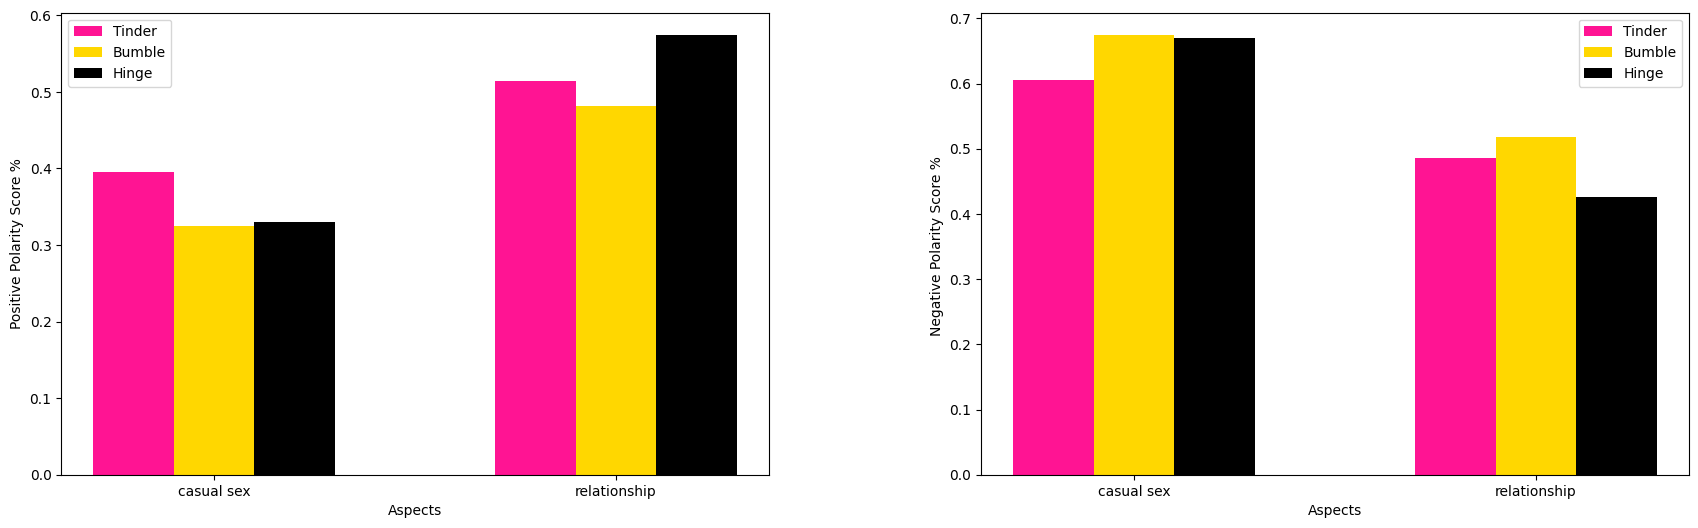

In [121]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects = ["casual sex", "relationship"], figsize=(21,6), avg=False)

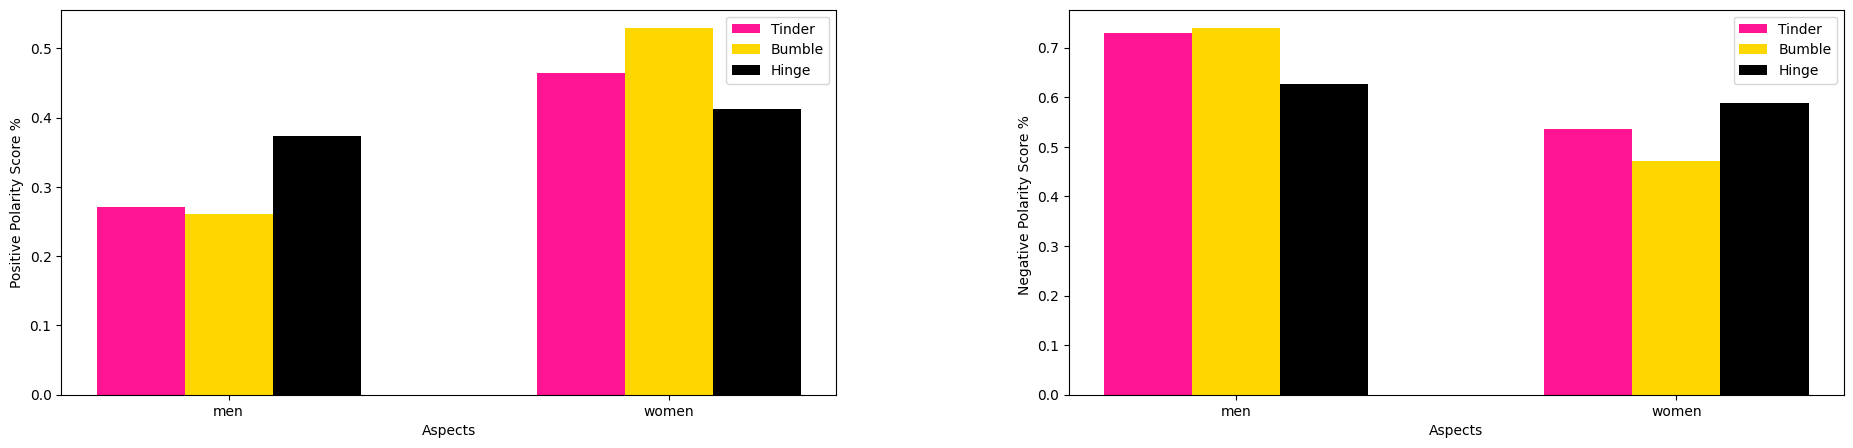

In [122]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["men", "women"], figsize=(23,5), avg=False)

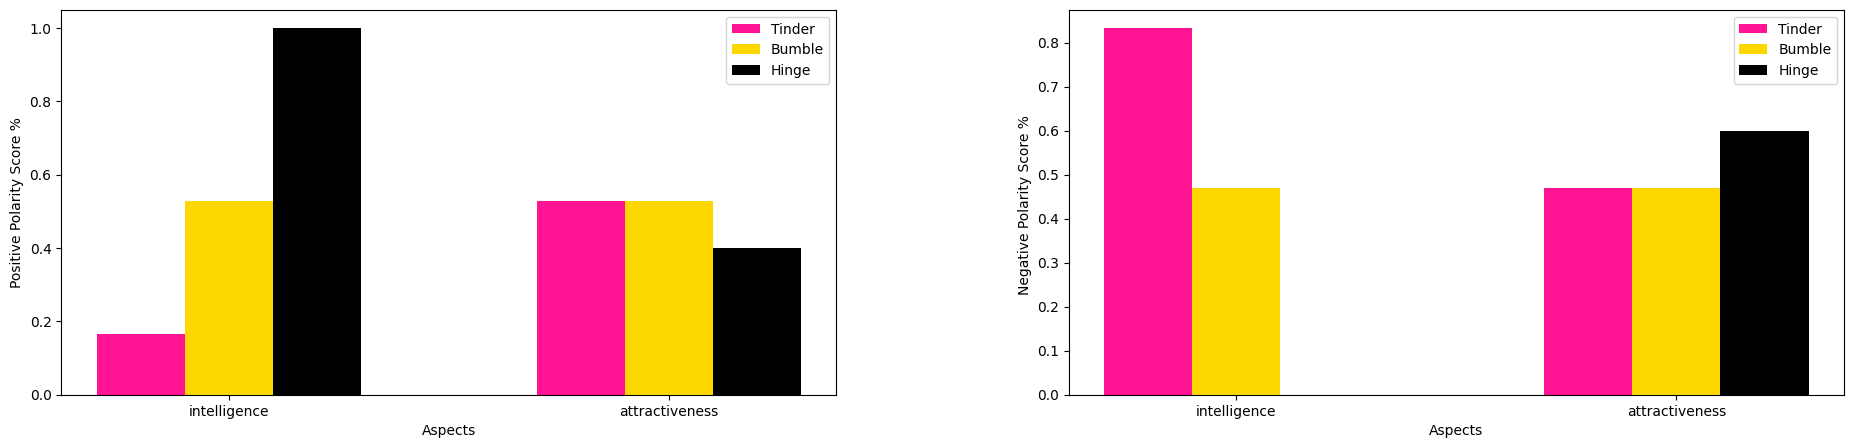

In [123]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["intelligence", "attractiveness"], figsize=(23,5), avg=False)